На примере векторов текстов мы демонстрируем работу алгоритма иерархической кластеризации.

In [ ]:
# Возьмем код из ноутбука по векторизации и превратим наши твиты в вектора.
# Напоминю, что первые четыре твита  типо юморные, а вторые - нет.
tweets = ['буратино утонул',
          'водяной утонул',
          'русалка села на шпагат',
          'змея села на шпагат',
          'у любви у нашей села батарейка',
          'лодка села на мель',
          'русалка и водяной в гостях у сказки',
          'змея в траве фото']

vocabulary = []
for tweet in tweets:
    tweet_split = tweet.split()
    for token in tweet_split:
        if token not in vocabulary:
            vocabulary.append(token)

tweet_vectors = []
for ft in tweets:
    tweet_vec = []
    ft_split = ft.split()
    for v in vocabulary:
        tweet_vec.append(ft_split.count(v))
    tweet_vectors.append(tweet_vec)

In [ ]:
# Посмотрим на полученные вектора - их можно представить как точки
# в многомерном пространстве. Значит, между ними можно померить расстояние.
tweet_vectors

[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]

In [ ]:
# Будем мерить евклидово расстояние. Это то же самое, что расстояние от
# ну, например, своего стула до экрана компьютера, только в системе координат.
# Оно вычисляется по теореме Пифагора. Есть две точки - отложим
# перпендикуляры к осям, которые образуют наше n-мерное пространство,
# по каждой оси вычислим расстояние между точками, суммируем
# результат и возьмем из него квадратный корень.
def euclidian(a, b):
    n_dims = len(a)
    sum_of_squares = 0
    for dim in range(n_dims):
        sum_of_squares += (a[dim] - b[dim]) ** 2
    return sum_of_squares ** 0.5

print(euclidian(tweet_vectors[0], tweet_vectors[7]))

2.449489742783178


In [ ]:
# Будем кластеризовать наши твиты так: сначала попарно объединим их в группы
# по принципу наибольшей близости. Если у нас будет три и более твитов,
# которые одинаково близко расположены, тогда все равно тоже записываем
# их в один кластер. Создадим копию векторов, чтобы исключать из него
# кластеры, которые мы уже установили.
dict_of_vectors = {}
for key in range(len(tweet_vectors)):
    dict_of_vectors[key] = tweet_vectors[key]

In [ ]:
# Создадим список всех возможных пар и измерим расстояние между ними.
# Результат запишем в словарь.
dict_of_pairs = {}
all_pos = list(range(len(tweet_vectors)))
for ap in all_pos[:-1]:
    for next_p in all_pos[ap+1:]:
        dict_of_pairs[(ap, next_p)] = euclidian(tweet_vectors[ap],
                                                tweet_vectors[next_p])

In [ ]:
dict_of_pairs

{(0, 1): 1.4142135623730951,
 (0, 2): 2.449489742783178,
 (0, 3): 2.449489742783178,
 (0, 4): 3.1622776601683795,
 (0, 5): 2.449489742783178,
 (0, 6): 3.0,
 (0, 7): 2.449489742783178,
 (1, 2): 2.449489742783178,
 (1, 3): 2.449489742783178,
 (1, 4): 3.1622776601683795,
 (1, 5): 2.449489742783178,
 (1, 6): 2.6457513110645907,
 (1, 7): 2.449489742783178,
 (2, 3): 1.4142135623730951,
 (2, 4): 3.1622776601683795,
 (2, 5): 2.0,
 (2, 6): 3.0,
 (2, 7): 2.8284271247461903,
 (3, 4): 3.1622776601683795,
 (3, 5): 2.0,
 (3, 6): 3.3166247903554,
 (3, 7): 2.449489742783178,
 (4, 5): 3.1622776601683795,
 (4, 6): 3.3166247903554,
 (4, 7): 3.4641016151377544,
 (5, 6): 3.3166247903554,
 (5, 7): 2.8284271247461903,
 (6, 7): 3.0}

In [ ]:
# Найдем в нашем словаре пары с наименьшим евклидовым расстоянием.
minimum_val = min(dict_of_pairs.values())
print(minimum_val)

1.4142135623730951


In [ ]:
# Посмотрим, какие пары образовались у нас на самом нижнем уровне.
first_pairs = []
for k, v in dict_of_pairs.items():
    if v == minimum_val:
        print(k)
        first_pairs.append(k)

(0, 1)
(2, 3)


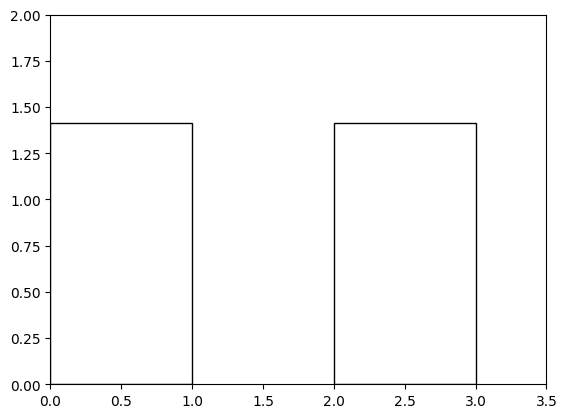

In [ ]:
# Изобразим их в виде первого уровня нашей дендрограммы.
# Ширина блоков: от 0 до 1 у первого и от 2 до 3 у второго.
# Высота блоков: минимальное расстояние между векторами.
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.set_xlim(0, 3.5)
ax.set_ylim(0, 2)
ax.add_patch(Rectangle((0, 0), 1, minimum_val,
                       edgecolor='black', facecolor='white'))
ax.add_patch(Rectangle((2, 0), 1, minimum_val,
                       edgecolor='black', facecolor='white'))
plt.show()

In [ ]:
# Удалим кластеризованные пары из нашего словаря
# и снова найдем минимальное расстояние.
for fp in first_pairs:
    dict_of_pairs.pop(fp)

minimum_val_2 = min(dict_of_pairs.values())
print(minimum_val_2)

2.0


In [ ]:
# Найдем пары второго уровня. Твиты 2 и 3 соединились с твитом 5.
second_pairs = []
for k, v in dict_of_pairs.items():
    if v == minimum_val_2:
        print(k)
        second_pairs.append(k)

(2, 5)
(3, 5)


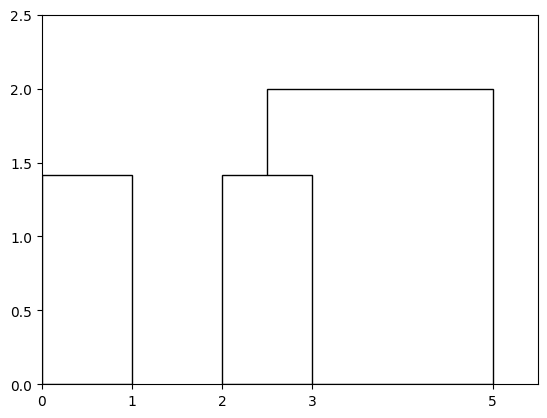

In [ ]:
# Изобразим полученный результат на дендрограмме.
# Обратите внимание, что, т.к. число 4 не вошло пока в кластер,
# число 5 занимает его место.
fig, ax = plt.subplots()
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 2.5)

ax.add_patch(Rectangle((2.5, 0), 2.5, minimum_val_2,
                       edgecolor='black', facecolor='white'))
ax.add_patch(Rectangle((0, 0), 1, minimum_val,
                       edgecolor='black', facecolor='white'))
ax.add_patch(Rectangle((2, 0), 1, minimum_val,
                       edgecolor='black', facecolor='white'))
plt.xticks([0, 1, 2, 3, 5])

plt.show()

In [ ]:
# Удалим слившиеся пары из нашего словаря.
for sp in second_pairs:
    dict_of_pairs.pop(sp)

In [ ]:
# И еще удалим пары, где есть 2 и 3, т.к. они теперь в кластере "5",
# и где есть 0, т.к. он теперь в кластере "1".
for k in list(dict_of_pairs.keys()):
    if 0 in k or 2 in k or 3 in k:
        dict_of_pairs.pop(k)

minimum_val_3 = min(dict_of_pairs.values())
print(minimum_val_3)

2.449489742783178


In [ ]:
# Найдем пары третьего уровня.
# Тут у нас есть конкуренция: можно слить  1 и 5 либо 1 и 7.
# Т.к. 5 - это кластер побольше, сливаем 1 с 7.
# Принцип тут такой: чтобы не создавать мегакластеры, в
# которые попадают большинство элементов, т.к.
# на каком-то уровне две точки из разных кластеров оказались рядом,
# лучше слить новую точку с кластером поменьше, но поплотнее.
# Т.е. нам надо сначала обрисовать маленькие листики, потом веточки,
# потом ствол дерева и, наконец, дойти до корня.
# Процесс, который помогает определить, как лучше сливать точки,
# называется linkage. Существует множество алгоритмов для linkage.
# Вот тут есть путаное объяснение этого процесса на английском
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# Но если у вас на каком-то уровне окажутся два кластера одинакового размера,
# то они присоединятся к первой попавшейся ветви.
# "In case of tied minimum distances, a pair is randomly chosen,
# thus being able to generate several structurally different dendrograms.
# Alternatively, all tied pairs may be joined at the same time,
# generating a unique dendrogram."
# https://en.wikipedia.org/wiki/Hierarchical_clustering
# Так что для этого алгоритма бывает важно перемешать элементы
# и сравнить результат.

third_pairs = []
for k, v in dict_of_pairs.items():
    if v == minimum_val_3:
        print(k)
        third_pairs.append(k)

(1, 5)
(1, 7)


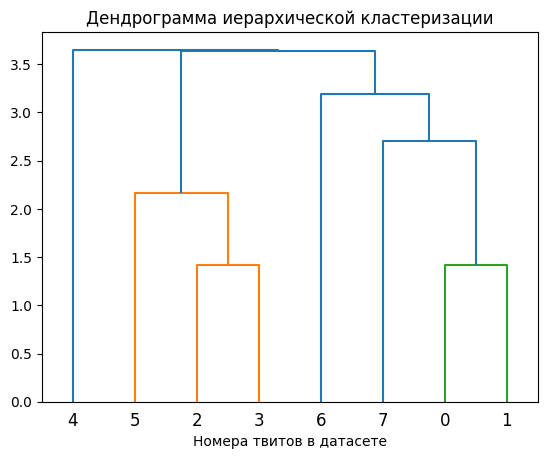

In [ ]:
# Рисовать это в matplotlib "геморно". Так что сразу перерисую результат
# в библиотеке scikit-learn + scipy.
# Копипаста кода взята отсюда:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = tweet_vectors

# setting distance_threshold=0 ensures we compute the full tree.
# От себя добавлю, что по дефолту этот алгоритм использует 'ward linkage'.
# Ну тот алгоритм выбора, какие следующие две точки слить,
# о котором я писала выше.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Дендрограмма иерархической кластеризации")
plot_dendrogram(model)
plt.xlabel("Номера твитов в датасете")
plt.show()

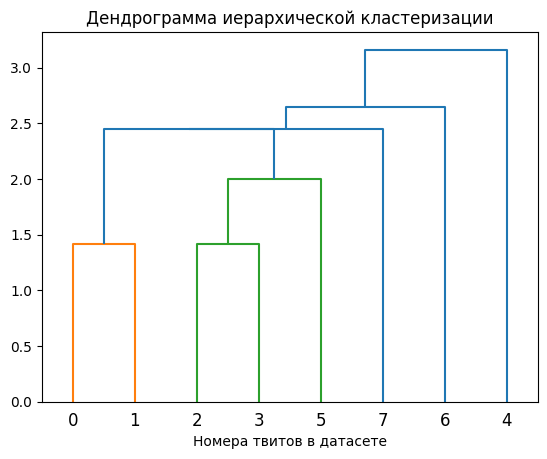

In [ ]:
# А давайте теперь переиграем linkage. Пусть будет single
# и пусть сливает конкурентов с одинаковым минимальным расстоянием
# сразу в один кластер. Смотрите, какая красота!
model = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Дендрограмма иерархической кластеризации")
plot_dendrogram(model)
plt.xlabel("Номера твитов в датасете")
plt.show()

Теперь попробуем проанализировать результат. На первом уровне все шло неплохо. Самыми близкими оказались две пары юморных твитов. Но затем произошло нежелательное событие. Твиты 2 и 3 объединились с пятым, т.к. у них общее слово "села". А потом вообще твиты 0 и 1 срослись с 7, т.к. у них много общих нулей. Т.е. отсутствующие слова в твитах сыграли бОльшую роль, чем присутствующие. В лингвистике часто бывает, что есть маркированный класс (юморные твиты, например) и есть все остальное, что создает шум. Поэтому важно моделировать данные так, чтобы задача решалась на важных, отличительных признаках маркированного класса. А мы просто весь словарь запихнули - но в принципе на первом шаге получилось неплохо. Так что выбор уровня дендрограммы тоже вещь полезная.